In [96]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [0]:
import pandas as pd
import numpy as np

# Machine learning libraries
from sklearn.preprocessing import scale
from sklearn.decomposition import FactorAnalysis
from sklearn.cluster import KMeans

# Visualization libraries
import matplotlib.pylab as plt
import seaborn as sns

In [98]:
#from google.colab import files
#uploaded = files.upload()

#get dataset


import os
import os.path

PATH='./XRF_dataset.csv'

if os.path.isfile(PATH) and os.access(PATH, os.R_OK):
    print("File exists and is readable")
else:
    #print "Either the file is missing or not readable"
    !wget https://raw.githubusercontent.com/brendonhall/clustering_tutorial/master/XRF_dataset.csv

File exists and is readable


In [99]:
geochem_df = pd.read_csv('XRF_dataset.csv')
print(geochem_df[:2])

  Well Name    Depth  Quartz  K-Feldspar  Plagioclase  Chlorite  \
0    Well 1  3173.97   27.56        0.40         8.17      5.46   
1    Well 1  3183.11   42.92        0.64         9.63      4.10   

   IlliteSmectiteMica  Calcite  Ankerite/Dolomite  Pyrite   ...    Fe2O3  \
0               20.73    26.11               9.30    1.94   ...     3.40   
1               15.61    18.31               5.07    1.51   ...     2.08   

    MnO   MgO    CaO  Na2O   K2O  P2O5   SO3    Cl      Zr  
0  0.02  0.53  19.49  0.78  1.19  0.20  1.20  0.28  201.70  
1  0.02  0.09  15.52  0.93  1.01  0.19  0.81  0.26  395.35  

[2 rows x 24 columns]


In [100]:
geochem_df['Si/Zr'] = geochem_df['SiO2'] / geochem_df['Zr']
geochem_df['Si/Al'] = geochem_df['SiO2'] / geochem_df['Al2O3']
geochem_df['Zr/Al'] = geochem_df['Zr'] / geochem_df['Al2O3']
print(geochem_df.columns)

Index(['Well Name', 'Depth', 'Quartz', 'K-Feldspar', 'Plagioclase', 'Chlorite',
       'IlliteSmectiteMica', 'Calcite', 'Ankerite/Dolomite', 'Pyrite',
       'Organics', 'Al2O3', 'SiO2', 'TiO2', 'Fe2O3', 'MnO', 'MgO', 'CaO',
       'Na2O', 'K2O', 'P2O5', 'SO3', 'Cl', 'Zr', 'Si/Zr', 'Si/Al', 'Zr/Al'],
      dtype='object')


In [110]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
data = geochem_df.iloc[:, 2:]
print(data[:1].columns)
print(len(data[:1].columns))
print(data[:1])


data = scale(data)
print(len(data[0]))

scaler = StandardScaler()
scaled_data = scaler.fit_transform(geochem_df.iloc[:,2:])

data == scaled_data

Index(['Quartz', 'K-Feldspar', 'Plagioclase', 'Chlorite', 'IlliteSmectiteMica',
       'Calcite', 'Ankerite/Dolomite', 'Pyrite', 'Organics', 'Al2O3', 'SiO2',
       'TiO2', 'Fe2O3', 'MnO', 'MgO', 'CaO', 'Na2O', 'K2O', 'P2O5', 'SO3',
       'Cl', 'Zr', 'Si/Zr', 'Si/Al', 'Zr/Al'],
      dtype='object')
25
   Quartz  K-Feldspar  Plagioclase  Chlorite  IlliteSmectiteMica  Calcite  \
0   27.56         0.4         8.17      5.46               20.73    26.11   

   Ankerite/Dolomite  Pyrite  Organics  Al2O3    ...        CaO  Na2O   K2O  \
0                9.3    1.94      0.34   7.27    ...      19.49  0.78  1.19   

   P2O5  SO3    Cl     Zr    Si/Zr     Si/Al      Zr/Al  
0   0.2  1.2  0.28  201.7  0.20942  5.810179  27.744154  

[1 rows x 25 columns]
25


array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

Text(0,0.5,'Magnitude')

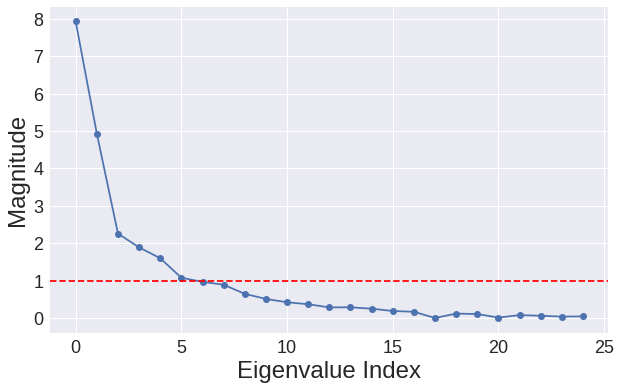

In [75]:
fig = plt.figure(figsize=(10,6))
covar_matrix = np.cov(data, rowvar=False)
eigenvalues = np.linalg.eig(covar_matrix)[0]
plt.plot(eigenvalues, 'o-')
plt.axhline(y=1.0, color='r', linestyle='--')
plt.tick_params(labelsize=18)
plt.xlabel('Eigenvalue Index', fontsize=24)
plt.ylabel('Magnitude', fontsize=24)

In [0]:
fa_model = FactorAnalysis(n_components = 6)
fa_model.fit(data)
factor_data = fa_model.transform(data)

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
factor_data = pca.fit_transform(data)

from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 6, kernel="rbf", gamma=0.04)
#factor_data = rbf_pca.fit_transform(data)

In [0]:
# create a dataframe consisting of the factor values for each data point
factor_df = pd.DataFrame(factor_data, columns=['Comp {}'.format(i) for i in range(0,6)])
factor_df['Well Name'] = geochem_df['Well Name']
factor_df['Depth'] = geochem_df['Depth']

# create a dataframe with the factor loadings associated with each observation
loading = fa_model.components_
component_names = geochem_df.columns.values[2:]
loading_df =  pd.DataFrame(loading,
                           columns=component_names)

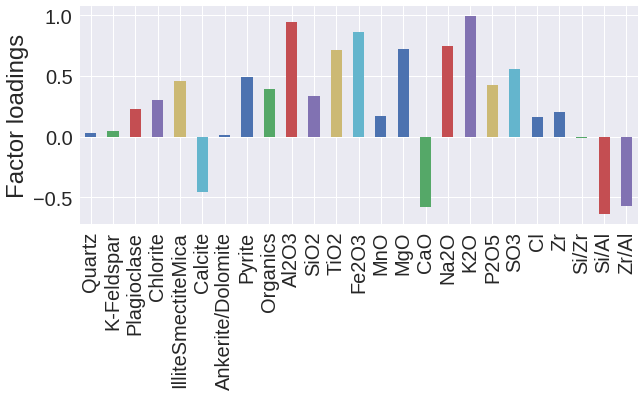

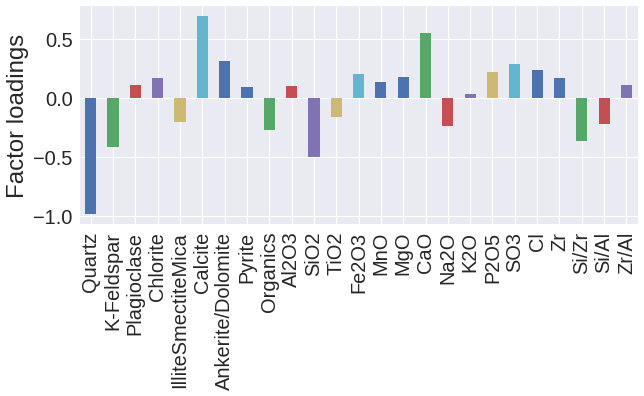

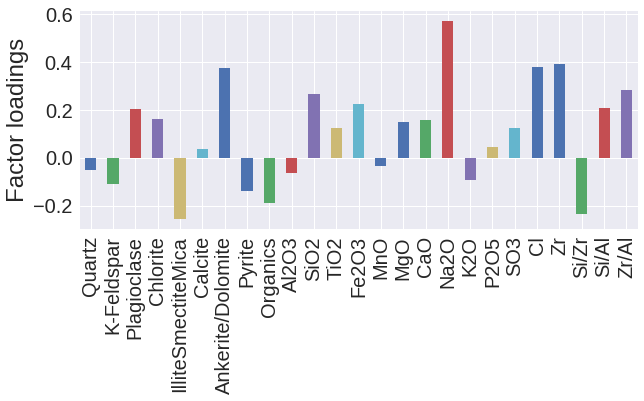

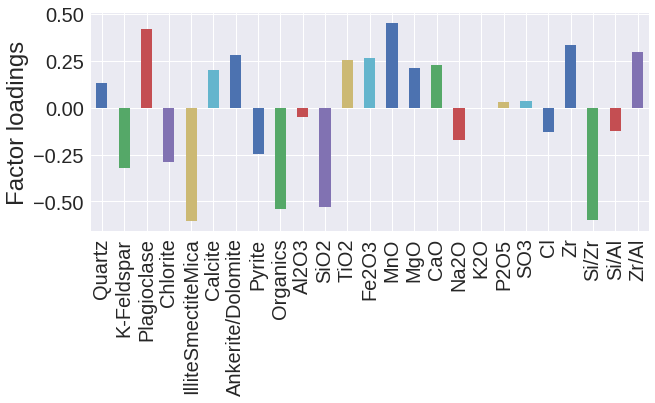

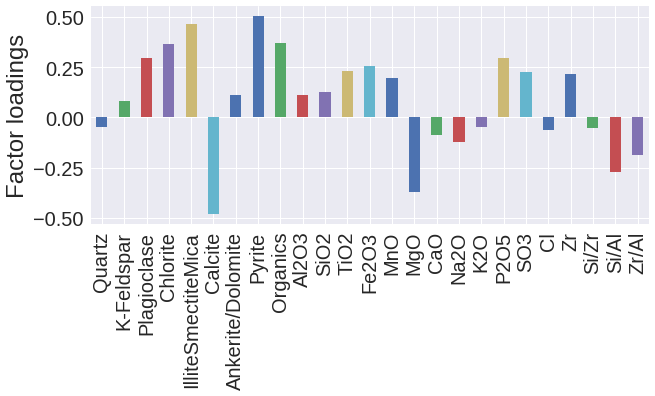

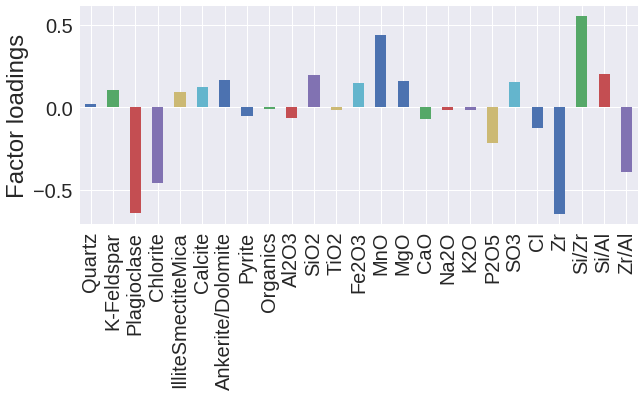

In [114]:
for factor_id in range(0, loading_df.shape[0]):

    # just plot the fourth factor, remove the loop to plot all
    #if factor_id == 4:
    fig = plt.figure(figsize=(10,4))
    plt.ylabel('Factor loadings', fontsize=24)
    loading_df.iloc[factor_id].plot(kind='bar')
    plt.tick_params(labelsize=20)
    #break
    #else:
    #   continue

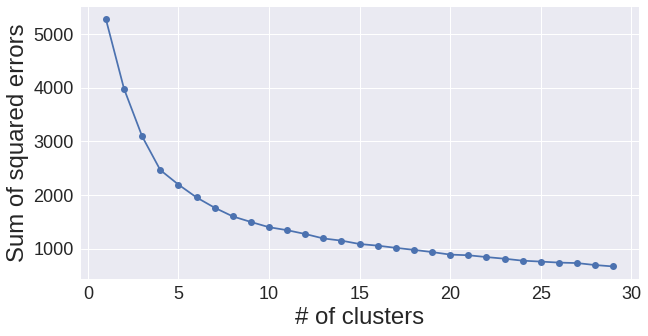

In [115]:
inertias = []
means = []
maxK = 30
for k in range(1, maxK):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(factor_data)
    means.append(k)
    inertias.append(kmeans.inertia_)

fig = plt.figure(figsize=(10,5))
plt.plot(means, inertias, 'o-')
plt.xlabel('# of clusters', fontsize=24)
plt.ylabel('Sum of squared errors', fontsize=24)
plt.tick_params(labelsize=18)

In [119]:
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(factor_data)

# add the cluster ids to the dataset
factor_df['Cluster'] = kmeans.labels_
geochem_df['Cluster'] = kmeans.labels_

print(geochem_df[:]['Cluster'].value_counts())

1    86
3    57
2    56
0    53
4    17
Name: Cluster, dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


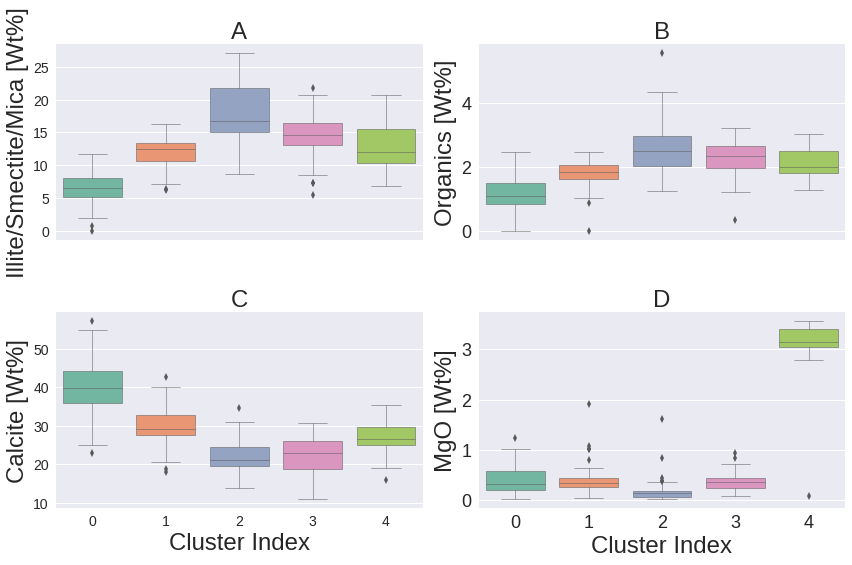

In [120]:

facies_colors = sns.color_palette("Set2", 6)

fig, ax = plt.subplots(2,2, figsize=(12,8), sharex=True)
b= sns.boxplot(x='Cluster', y='IlliteSmectiteMica', linewidth=0.5,
            data=geochem_df, ax=ax[0,0],
            palette=facies_colors)
b.set_title("A",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Illite/Smectite/Mica [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b= sns.boxplot(x='Cluster', y='Organics', linewidth=0.5,
            data=geochem_df, ax=ax[0,1],
            palette=facies_colors)
b.set_title("B",fontsize=24)
b.set_xlabel("")
b.set_ylabel("Organics [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

b=sns.boxplot(x='Cluster', y='Calcite', linewidth=0.5,
            data=geochem_df, ax=ax[1,0],
            palette=facies_colors)
b.set_title("C",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("Calcite [Wt%]",fontsize=24)
b.tick_params(labelsize=14)

b=sns.boxplot(x='Cluster', y='MgO', linewidth=0.5,
            data=geochem_df, ax=ax[1,1],
            palette=facies_colors)
b.set_title("D",fontsize=24)
b.set_xlabel("Cluster Index",fontsize=24)
b.set_ylabel("MgO [Wt%]",fontsize=24)
b.tick_params(labelsize=18)

plt.tight_layout()